In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ=pd.read_csv('fuel-econ.csv')

In [3]:
#converts "VClass" column from object to ordered categorical type

vclasses=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses=pd.api.types.CategoricalDtype(ordered=True,categories=vclasses)

fuel_econ['VClass']=fuel_econ['VClass'].astype(vclasses)

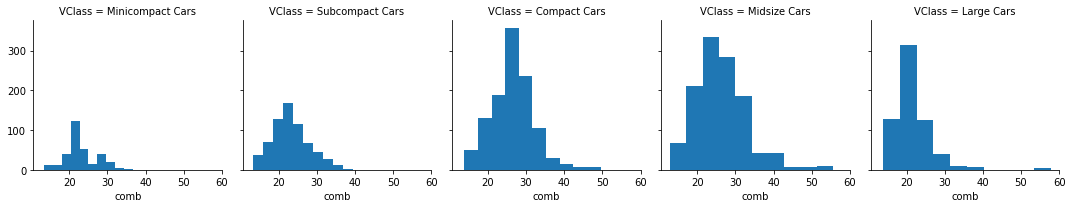

In [4]:
#plots seaborn facegrid
fg=sb.FacetGrid(data=fuel_econ,col='VClass')
fg.map(plt.hist,'comb')

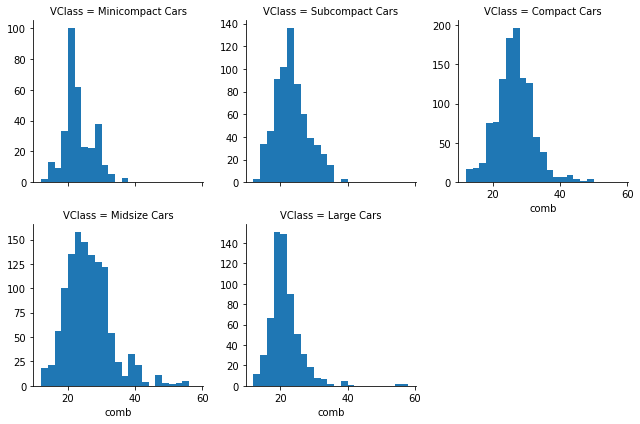

In [5]:
#plots seaborn facegrid with equal bins
bins=np.arange(12,58+2,2)
fg=sb.FacetGrid(data=fuel_econ,col='VClass',col_wrap=3,sharey=False)
fg.map(plt.hist,'comb',bins=bins)

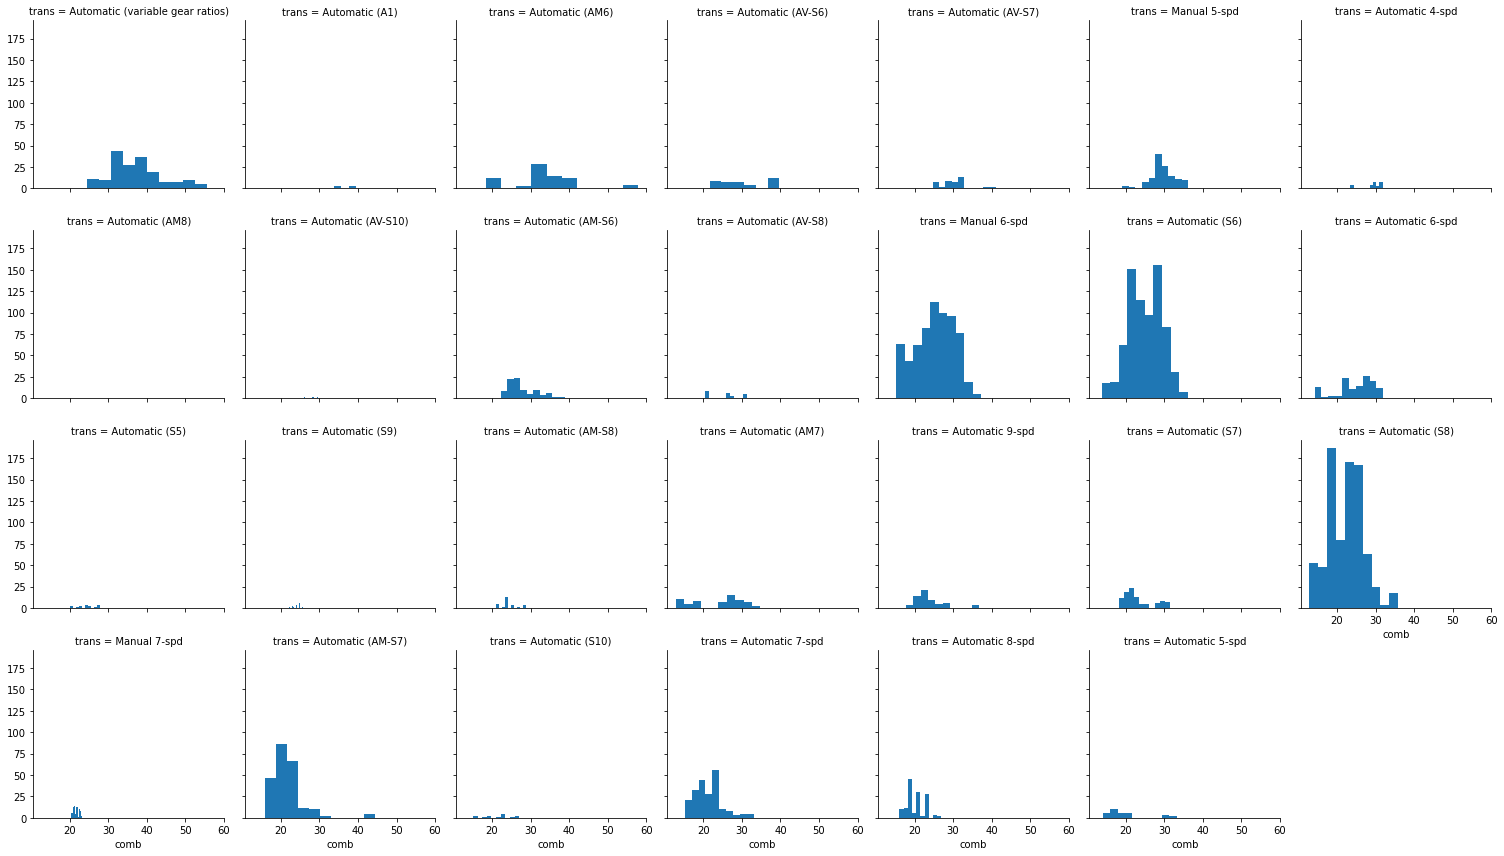

In [8]:
#combined fuel efficiency per transmission
group_means=fuel_econ[['trans','comb']].groupby(['trans']).mean()

group_order=group_means.sort_values(['comb'],ascending=False).index

fgrid=sb.FacetGrid(data=fuel_econ,col='trans',col_wrap=7,col_order=group_order)
fgrid.map(plt.hist,'comb')

### Adaptation of Univariate Plots

Text(0, 0.5, 'Avg .Combined Fuel Efficiency(mpg)')

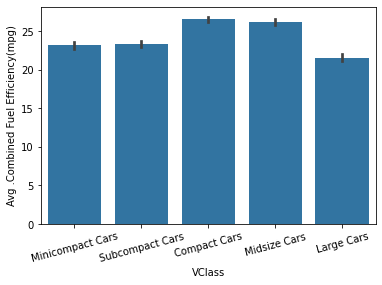

In [15]:
base_color=sb.color_palette()[0]
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg .Combined Fuel Efficiency(mpg)')
          

Text(0, 0.5, 'Avg .Combined Fuel Efficiency(mpg)')

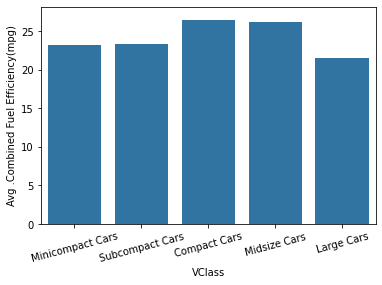

In [18]:
base_color=sb.color_palette()[0]
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color,errwidth=0)
plt.xticks(rotation=15);
plt.ylabel('Avg .Combined Fuel Efficiency(mpg)')
          

<AxesSubplot:xlabel='VClass', ylabel='comb'>

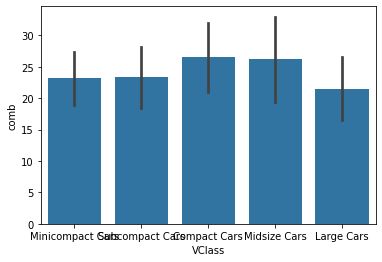

In [19]:
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color,ci='sd')


**As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.**

**Example 2**

Text(0.5, 0, 'Avg. Combined Fuel Efficiency (mpg)')

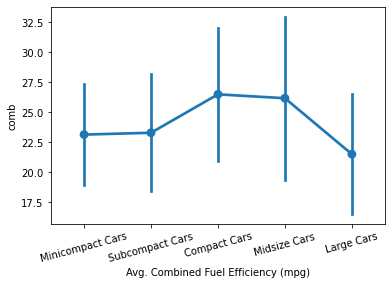

In [22]:
sb.pointplot(data=fuel_econ,x='VClass',y='comb',color=base_color,ci='sd')
plt.xticks(rotation=15)
plt.xlabel('Avg. Combined Fuel Efficiency (mpg)')

Text(0.5, 0, 'Avg. Combined Fuel Efficiency (mpg)')

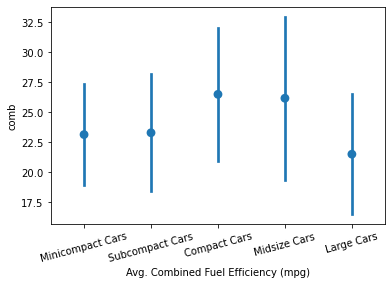

In [21]:
sb.pointplot(data=fuel_econ,x='VClass',y='comb',color=base_color,ci='sd',linestyles="")
plt.xticks(rotation=15)
plt.xlabel('Avg. Combined Fuel Efficiency (mpg)')

**Bringing a few charts together**

Left Plot: violin plot
Center Plot:box plot
Right Plot: adapted barplot

Text(0.5, 0, 'Vehicle fuel efficiency')

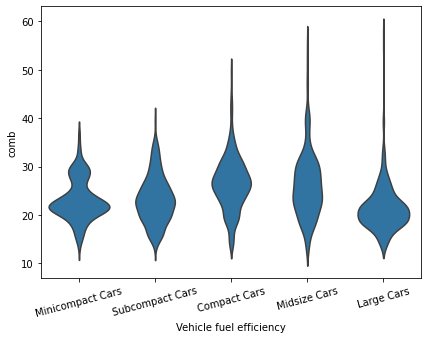

In [27]:
plt.figure(figsize=[15,5])
base_color=sb.color_palette()[0]

#Left Plot: violin plot

plt.subplot(1,2,1)
sb.violinplot(data=fuel_econ,x='VClass',y='comb',color=base_color,inner=None)
plt.xticks(rotation=15)
plt.xlabel('Vehicle fuel efficiency')

#Center Plot: Box Plot